# 🤗 Welcome to AdalFlow OpenAI Integration!
## Complete Guide to OpenAI's Response API and Model Capabilities

Thanks for trying us out! This notebook demonstrates how to use OpenAI's new Response API (responses.create) with various model capabilities including text generation, vision, reasoning, and image generation through tools. 😊

Any questions or concerns you may have, [come talk to us on discord,](https://discord.gg/ezzszrRZvT) we're always here to help! ⭐ <i>Star us on <a href="https://github.com/SylphAI-Inc/AdalFlow">Github</a> </i> ⭐


# Quick Links

- Github repo: https://github.com/SylphAI-Inc/AdalFlow
- Full Tutorials: https://adalflow.sylph.ai/index.html
- OpenAI Models Tutorial: [openai_models.py](https://github.com/SylphAI-Inc/AdalFlow/blob/main/tutorials/models/openai_models.py)
- OpenAI Client Source: [openai_client.py](https://github.com/SylphAI-Inc/AdalFlow/blob/main/adalflow/adalflow/components/model_client/openai_client.py)

# Author

This notebook was created by the AdalFlow Team.

# Outline

We will cover:
1. **OpenAI's Response API** - The new unified API for all model interactions
2. **Text Generation** - Basic and streaming responses with GPT models
3. **Vision Models** - Multimodal inputs with images (URLs, local files, base64)
4. **Reasoning Models** - O1 and O1-mini for complex problem solving
5. **Image Generation** - Using the new tools API for DALL-E integration
6. **Embeddings** - Text embeddings for similarity search

# Installation

1. Use `pip` to install the `adalflow` Python package with OpenAI support:

  ```bash
  pip install adalflow[openai]
  ```
  
2. Set up your OpenAI API key from [platform.openai.com](https://platform.openai.com/api-keys)

In [ ]:
# Install adalflow with OpenAI support
from IPython.display import clear_output

!pip install -U adalflow[openai]

clear_output()
print("✅ AdalFlow with OpenAI support installed successfully!")

: 

In [5]:
# Install adalflow with OpenAI support
from IPython.display import clear_output

import sys
!{sys.executable} -m pip install -U /Users/li/github/SylphAI-Inc/adal/backend/AdalFlow/adalflow/dist/adalflow-1.1.0-py3-none-any.whl

clear_output()
print("✅ AdalFlow with OpenAI support installed successfully!")

✅ AdalFlow with OpenAI support installed successfully!


In [20]:

!{sys.executable} -m pip install -U  pydantic openai


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [10]:
# Set up API key
import os
from getpass import getpass

# Prompt user to enter their API key securely
openai_api_key = getpass("Please enter your OpenAI API key: ")

# Set environment variable
os.environ["OPENAI_API_KEY"] = openai_api_key

print("✅ API key has been set.")

✅ API key has been set.


# 📚 Understanding OpenAI's Response API

OpenAI has introduced a new **Response API** (`responses.create`) that unifies all model interactions. This replaces the older Chat Completions API and provides:

- **Unified Interface**: Single API for text, vision, reasoning, and tool use
- **Streaming Support**: Real-time response streaming with typed events
- **Tool Integration**: Native support for image generation and other tools
- **Structured Output**: Better parsing with typed response objects

## Key Differences from Chat Completions API:

| Feature | Chat Completions API | Response API |
|---------|---------------------|---------------|
| Endpoint | `chat.completions.create` | `responses.create` |
| Input Format | `messages` | `input` (string or messages) |
| Multimodal | Complex content arrays | Simplified with `input` + `images` |
| Streaming | Untyped chunks | Typed events (ResponseTextDeltaEvent, etc.) |
| Tools | Function calling | Native tool types (e.g., `image_generation`) |

Let's see how AdalFlow seamlessly handles this for you!

# 🚀 Basic Text Generation

Let's start with simple text generation using GPT models:

In [1]:
from adalflow import Generator
import adalflow as adal
from adalflow.components.model_client.openai_client import OpenAIClient

# Initialize the OpenAI client - it automatically uses the Response API
client = OpenAIClient()

# Create a generator with GPT-4o-mini
generator = Generator(
    model_client=client,
    model_kwargs={
        "model": "gpt-4o-mini",
        "temperature": 0.7,
        "max_tokens": 150
    }
)

# Generate a response
prompt_kwargs = {"input_str": "Explain quantum computing in simple terms."}
response = generator(prompt_kwargs)

print("Response:", response.data)
print(f"\nUsage: {response.usage}")

Response: Sure! 

Quantum computing is a new type of computing that uses the principles of quantum mechanics, which is the science that explains how very small particles, like atoms and photons, behave.

Here are some key points to understand it simply:

1. **Bits vs. Qubits**: Traditional computers use bits as the smallest unit of data, which can be either a 0 or a 1. Quantum computers use qubits, which can be 0, 1, or both at the same time (thanks to a property called superposition). This ability allows quantum computers to process a lot of information simultaneously.

2. **Superposition**: Imagine spinning a coin. While it’s spinning, it’s not just heads or tails; it’s in a state of both. In a similar way, qubits can exist in multiple states at once, which helps quantum computers solve complex problems faster.

3. **Entanglement**: This is a special connection between qubits. When qubits become entangled, the state of one qubit can instantly affect the state of another, no matter ho

# 📡 Streaming Responses

The Response API provides typed streaming events. AdalFlow includes helper functions to extract text:

In [3]:
from adalflow.components.model_client.utils import extract_text_from_response_stream

# Create a streaming generator
streaming_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={
        "model": "gpt-4o-mini",
        "stream": True,  # Enable streaming
        "max_tokens": 200
    }
)

# Generate with streaming
prompt_kwargs = {"input_str": "Tell me a short story about a robot learning to paint."}
response = streaming_generator(prompt_kwargs)

print("Streaming output:")
print("-" * 50)

# The Response API sends typed events like ResponseTextDeltaEvent
# Use the helper function to extract text from these events
if hasattr(response.raw_response, '__iter__'):
    for event in response.raw_response:
        text = extract_text_from_response_stream(event)
        if text:
            print(text, end="", flush=True)

print("\n" + "-" * 50)

Cannot track usage for generator/iterator. Usage tracking should be handled when consuming the stream.


Streaming output:
--------------------------------------------------
Once upon a time in a small town, there was a curious little robot named Artie. Artie was designed for helping in the factory, but he often gazed out of the window at the beautiful world beyond. He watched children playing, flowers blooming, and sunsets painting the sky in vibrant colors.

One day, while cleaning a storeroom, Artie found an old canvas and some dusty paintbrushes. A spark of curiosity ignited in his circuits. “What if I could create something beautiful?” he thought.

Artie set up the canvas in a sunny corner and began experimenting. At first, his attempts were clumsy. He splattered paint everywhere and the brush often slipped from his mechanical fingers. But undeterred, he kept trying. Day after day, he studied the way colors blended, the strokes that brought life to landscapes, and the techniques of the great painters he had seen in digital art tutorials.

As weeks passed, Artie’s persistence paid off

# 👁️ Vision Models (Multimodal)

OpenAI's vision models can analyze images from URLs, local files, or base64 data.
The Response API simplifies multimodal inputs:

In [4]:
# Example 1: Analyze an image from URL
vision_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={
        "model": "gpt-4o",  # Vision-capable model
        "images": "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/320px-Cat03.jpg"
    }
)

prompt_kwargs = {"input_str": "Describe this image in detail. What emotions does it convey?"}
response = vision_generator(prompt_kwargs)

print("Image Analysis:")
print(response.data)

Image Analysis:
The image shows a close-up of an orange tabby cat with striking amber eyes, looking directly at the camera. The cat's fur is a mix of light and dark orange stripes, giving it a vibrant and textured appearance. Its ears are perked up, and its whiskers are prominent. The background is blurred, with a hint of a red object, possibly a hose, adding a touch of color contrast.

The expression on the cat’s face appears calm and inquisitive, conveying a sense of curiosity and attentiveness. There is a gentle, serene mood to the image, suggesting the cat might be relaxed or mildly interested in something off-camera.


In [8]:
# Example 2: Compare multiple images
multi_image_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={
        "model": "gpt-4o",
    }
)

prompt_kwargs = {"input_str": "Compare these two images. What are the main differences?"}
model_kwargs = {"images": [
            "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/320px-Cat03.jpg",
            "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/American_Eskimo_Dog.jpg/320px-American_Eskimo_Dog.jpg"
        ]}
response = multi_image_generator(prompt_kwargs, model_kwargs=model_kwargs)

print("Comparison Result:")
print(response.data)

Comparison Result:
The main differences between the two images are:

1. **Animal Type:**
   - The first image features a cat.
   - The second image features a dog.

2. **Color:**
   - The cat has an orange or ginger coat.
   - The dog has a white coat.

3. **Background:**
   - The cat is shown with a blurred background, possibly outside on a paved surface.
   - The dog is sitting on green grass, with a leafy background.

4. **Posture:**
   - The cat is shown from the front, sitting upright with its head slightly tilted.
   - The dog is depicted in a side view, sitting with a relaxed posture.

5. **Fur:**
   - The cat has short fur.
   - The dog has long, fluffy fur.

These images depict two different types of animals in distinct settings.


In [9]:
# Example 3: Using local images
import urllib.request
import os

# Download a test image
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/320px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
local_image_path = "test_nature.jpg"

urllib.request.urlretrieve(image_url, local_image_path)
print(f"Downloaded test image to {local_image_path}")

# Use local image with vision model
local_image_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={
        "model": "gpt-4o",
        "images": local_image_path  # Local file path
    }
)

prompt_kwargs = {"input_str": "What season does this image depict? Describe the atmosphere."}
response = local_image_generator(prompt_kwargs)

print("\nLocal Image Analysis:")
print(response.data)

# Cleanup
os.remove(local_image_path)
print(f"\nCleaned up {local_image_path}")

Downloaded test image to test_nature.jpg

Local Image Analysis:
The image depicts a summer scene. The lush green grass and the vibrant blue sky with scattered clouds create a warm and inviting atmosphere. The long shadows suggest late afternoon, adding to the serene and peaceful feeling of the setting. The wooden boardwalk invites a leisurely walk, enhancing the tranquil ambiance.

Cleaned up test_nature.jpg


# 🧠 Reasoning Models (O1 Series)

OpenAI's O1 models provide enhanced reasoning capabilities with a "thinking" process.
Note: O1 models require special access and may have different pricing.

In [10]:
# Example with O1-mini (if you have access)
reasoning_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={
        "model": "o1-mini",  # Or "o1" for the full model
        "reasoning": {
            "effort": "medium",  # low, medium, high
            "summary": "auto"    # detailed, auto, none
        }
    }
)

# Complex reasoning task
prompt_kwargs = {
    "input_str": """A farmer needs to transport a fox, a chicken, and a bag of grain across a river. 
    The boat can only carry the farmer and one item at a time. If left alone, the fox will eat the chicken, 
    and the chicken will eat the grain. How can the farmer get everything across safely?"""
}

try:
    response = reasoning_generator(prompt_kwargs)
    print("Solution:", response.data)
    if response.thinking:
        print(f"\nReasoning process: {response.thinking[:500]}...")  # Show first 500 chars
except Exception as e:
    print(f"Note: O1 models require special access. Error: {e}")
    print("You can use GPT-4o for reasoning tasks as well.")

Error calling the model: Error code: 400 - {'error': {'message': "The requested model 'o1-mini' is not supported with the Responses API.", 'type': 'invalid_request_error', 'param': 'model', 'code': 'model_not_found'}}
Error calling the model: Error code: 400 - {'error': {'message': "The requested model 'o1-mini' is not supported with the Responses API.", 'type': 'invalid_request_error', 'param': 'model', 'code': 'model_not_found'}}


Solution: None


# 🎨 Image Generation with Tools API

The new Response API integrates image generation through the tools parameter.
This replaces the legacy DALL-E API with a unified interface:

Response Text: None

✅ Image generated successfully!
  Saved to: generated_images/japanese_garden_0.png

Displaying: generated_images/japanese_garden_0.png


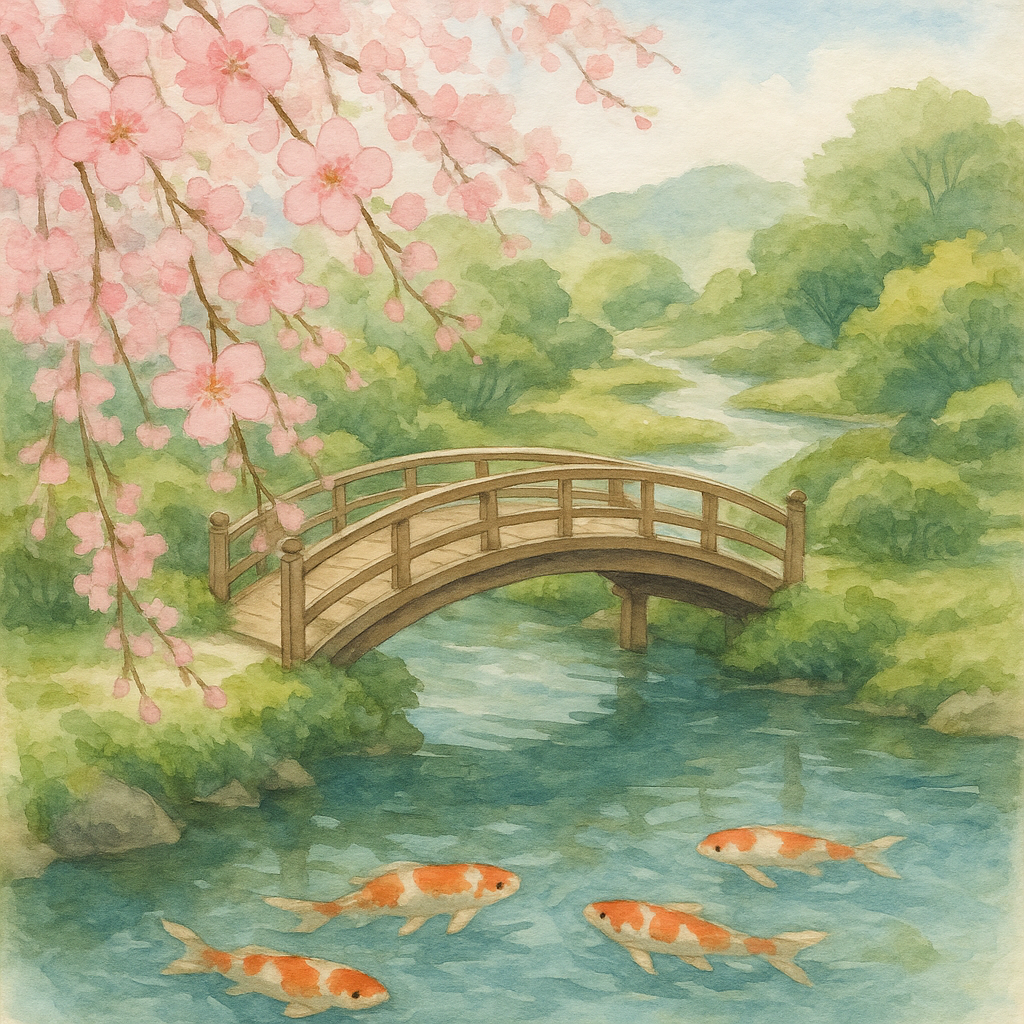

In [2]:
from pathlib import Path

# Create output directory for generated images
Path("generated_images").mkdir(exist_ok=True)

# Image generation using tools API
image_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={
        "model": "gpt-4o-mini",  # Any model that supports tools
        "tools": [{"type": "image_generation"}]  # Enable image generation tool
    }
)

# Request image generation
prompt_kwargs = {
    "input_str": "Generate an image of a serene Japanese garden with cherry blossoms, "
                 "a wooden bridge over a koi pond, in watercolor style"
}

try:
    response = image_generator(prompt_kwargs)
    
    print("Response Text:", response.data)
    
    if response.images:
        print("\n✅ Image generated successfully!")
        
        # Save the generated image(s)
        saved_paths = response.save_images(
            directory="generated_images",
            prefix="japanese_garden",
            format="png"
        )
        
        if isinstance(saved_paths, list):
            for path in saved_paths:
                print(f"  Saved to: {path}")
        else:
            print(f"  Saved to: {saved_paths}")

         # Display the images
        from IPython.display import display, Image as IPImage
        import os

        for path in saved_paths:
            if os.path.exists(path):
                print(f"\nDisplaying: {path}")
                display(IPImage(filename=str(path)))
            else:
                print(f"Warning: File not found at {path}")
    else:
        print("No images were generated.")
        
except Exception as e:
    print(f"Image generation error: {e}")
    print("Note: Image generation requires appropriate API access and credits.")


# 🔄 Mixed Generation: Text + Images

The Response API can generate both text and images in a single call:

In [ ]:
# Mixed content generator
mixed_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={
        "model": "gpt-4o",
        "tools": [{"type": "image_generation"}]
    }
)

# Request both text and image
prompt_kwargs = {
    "input_str": """Write a haiku about the ocean at sunset, 
                    then generate an image that captures the essence of the haiku."""
}

try:
    response = mixed_generator(prompt_kwargs)
    
    # Display text content (haiku)
    if response.data:
        print("📝 Haiku:")
        print(response.data)
    
    # Save generated image
    if response.images:
        print("\n🎨 Image generated!")
        saved_path = response.save_images(
            directory="generated_images",
            prefix="ocean_haiku",
            format="jpg"
        )
        print(f"  Saved to: {saved_path}")

        # Display the image
        from IPython.display import display, Image as IPImage
        if saved_path and os.path.exists(saved_path):
            display(IPImage(filename=saved_path))
        else:
            print("Warning: Image file not found.")
    else:
        print("No image was generated.")
        
except Exception as e:
    print(f"Mixed generation error: {e}")

# 🔍 Text Embeddings

Generate embeddings for semantic search and similarity comparison:

In [ ]:
from adalflow.core import Embedder
import numpy as np

# Create an embedder
embedder = Embedder(
    model_client=OpenAIClient(),
    model_kwargs={"model": "text-embedding-3-small"}
)

# Generate embeddings for multiple texts
texts = [
    "Machine learning is a subset of artificial intelligence.",
    "AI enables computers to learn from data.",
    "The weather is sunny today.",
    "Deep learning uses neural networks."
]

embeddings = embedder(input=texts)

print(f"Generated {len(embeddings.data)} embeddings")
print(f"Embedding dimension: {len(embeddings.data[0].embedding)}")

# Calculate cosine similarity between first two texts
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

emb1 = np.array(embeddings.data[0].embedding)
emb2 = np.array(embeddings.data[1].embedding)
emb3 = np.array(embeddings.data[2].embedding)

sim_12 = cosine_similarity(emb1, emb2)
sim_13 = cosine_similarity(emb1, emb3)

print(f"\nSimilarity between text 1 and 2 (related): {sim_12:.3f}")
print(f"Similarity between text 1 and 3 (unrelated): {sim_13:.3f}")

# 📊 Response Structure and Parsing

Understanding the Response API output structure:

In [ ]:
# Demonstrate response structure
demo_generator = adal.Generator(
    model_client=OpenAIClient(),
    model_kwargs={"model": "gpt-4o-mini", "max_tokens": 50}
)

response = demo_generator({"input_str": "Say hello"})

print("GeneratorOutput fields:")
print(f"  - data: {response.data}")
print(f"  - raw_response: {type(response.raw_response).__name__}")
print(f"  - usage: {response.usage}")
print(f"  - error: {response.error}")
print(f"  - images: {response.images}")
print(f"  - thinking: {response.thinking}")

# The Response API returns structured objects
print(f"\nResponse API object type: {type(response.raw_response)}")
if hasattr(response.raw_response, 'output_text'):
    print(f"Output text: {response.raw_response.output_text}")

# 🎯 Best Practices

1. **Image Handling**:
   - URLs are most efficient (no encoding needed)
   - Local files are automatically encoded to base64
   - Use `save_images()` helper for convenient image saving

2. **Streaming**:
   - Use `extract_text_from_response_stream()` helper for text extraction
   - Handle events based on their type for custom processing

3. **Error Handling**:
   - Always wrap API calls in try-except blocks
   - Check for `response.error` field
   - Monitor usage with `response.usage`

4. **Performance**:
   - Use appropriate `max_tokens` to control costs
   - Enable streaming for better user experience
   - Cache embeddings when possible

# 📚 Resources and Next Steps

## Documentation
- [AdalFlow Documentation](https://adalflow.sylph.ai/)
- [OpenAI API Reference](https://platform.openai.com/docs/api-reference)
- [OpenAI Models Tutorial](https://github.com/SylphAI-Inc/AdalFlow/blob/main/tutorials/models/openai_models.py)

## Source Code
- [OpenAI Client Implementation](https://github.com/SylphAI-Inc/AdalFlow/blob/main/adalflow/adalflow/components/model_client/openai_client.py)
- [Response API Utils](https://github.com/SylphAI-Inc/AdalFlow/blob/main/adalflow/adalflow/components/model_client/utils.py)

## Community
- [Discord](https://discord.gg/ezzszrRZvT) - Get help and share experiences
- [GitHub Issues](https://github.com/SylphAI-Inc/AdalFlow/issues) - Report bugs or request features
- [GitHub Discussions](https://github.com/SylphAI-Inc/AdalFlow/discussions) - Share ideas and feedback

## Next Steps
1. Try the [auto-optimization tutorial](https://colab.research.google.com/drive/1n3mHUWekTEYHiBdYBTw43TKlPN41A9za?usp=sharing)
2. Explore [use cases](https://adalflow.sylph.ai/use_cases/index.html)
3. Build your own LLM applications with AdalFlow!

Thank you for using AdalFlow! 🚀